In [6]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8) # set default figure size
from sklearn.linear_model import LinearRegression

In [2]:
# import merged dataset 

df = pd.read_csv('https://raw.githubusercontent.com/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/main/merged.csv')
df.head()

,Hour,Day,Month,CrashCount,Precipitation,Snow_Dummy,Precipitation_Dummy
0,0,1,1,14,0.060714,0,1
1,0,1,2,13,0.019231,1,1
2,0,1,3,19,0.247368,1,1
3,0,1,4,19,0.015789,0,1
4,0,1,5,11,0.085455,0,1


In [3]:
# create a DataFrame of aggregated CrashCount and average precipitation by month and hour

monthly = df.groupby(['Month', 'Hour'], as_index= False).agg({'CrashCount':'mean', 'Precipitation': 'mean'})
monthly.head()

,Month,Hour,CrashCount,Precipitation
0,1,0,16.451613,0.067714
1,1,1,16.290323,0.086894
2,1,2,15.419355,0.095146
3,1,3,12.225806,0.089673
4,1,4,9.064516,0.080308


                                 OLS Regression Results                                
Dep. Variable:             CrashCount   R-squared (uncentered):                   0.679
Model:                            OLS   Adj. R-squared (uncentered):              0.678
Method:                 Least Squares   F-statistic:                              608.3
Date:                Tue, 27 Apr 2021   Prob (F-statistic):                    7.10e-73
Time:                        04:02:16   Log-Likelihood:                         -981.05
No. Observations:                 288   AIC:                                      1964.
Df Residuals:                     287   BIC:                                      1968.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

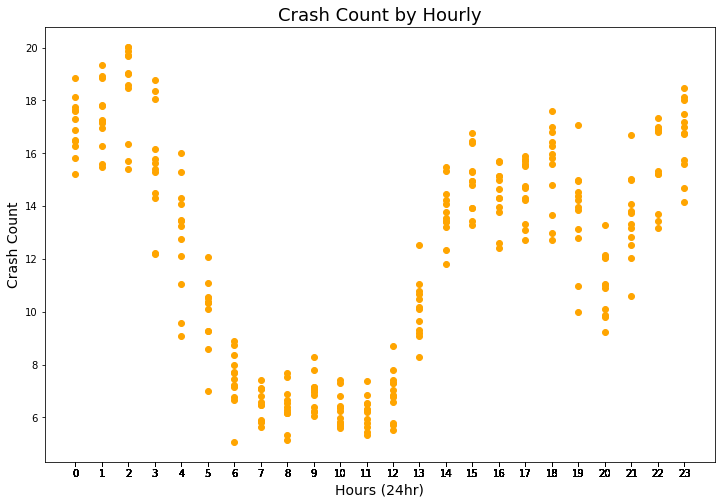

In [7]:
# Perform OLS Regression based on hourly data and display results

x = monthly['Hour']
y = monthly['CrashCount']

result1 = sm.OLS(y, x).fit()
print(result1.summary(), '\n')

# display crash count by the hour
plt.scatter(x, y, color = 'orange')
plt.xticks(x.values)
plt.xlabel('Hours (24hr)', fontsize = 14)
plt.ylabel('Crash Count', fontsize = 14)
plt.title('Crash Count by Hourly', fontsize = 18)

plt.show()

                                 OLS Regression Results                                
Dep. Variable:             CrashCount   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                              1062.
Date:                Tue, 27 Apr 2021   Prob (F-statistic):                    1.87e-98
Time:                        04:02:20   Log-Likelihood:                         -922.02
No. Observations:                 288   AIC:                                      1846.
Df Residuals:                     287   BIC:                                      1850.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

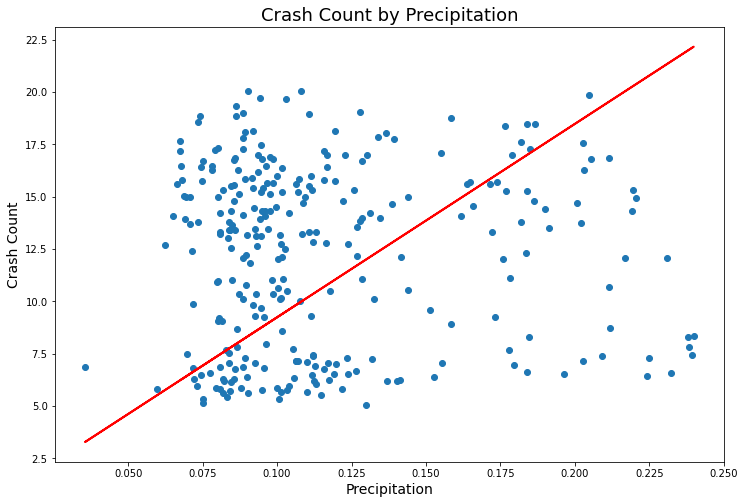

In [8]:
# Perform OLS Regression based on precipitation data and display results

prec = monthly['Precipitation']
y = monthly['CrashCount']

result2 = sm.OLS(y, prec).fit()
print(result2.summary(), '\n')

# Predict values
result_pred = result2.predict()

# Plot regression against actual data
plt.plot(prec, y, 'o') # scatter plot showing actual data
plt.plot(prec, result_pred, 'r', linewidth=2)   # regression line
plt.xlabel('Precipitation', fontsize = 14)
plt.ylabel('Crash Count', fontsize = 14)
plt.title('Crash Count by Precipitation', fontsize = 18 )

plt.show()